# EMMY winner analysis

The Primetime Emmy Award is an American award bestowed by the Academy of Television Arts & Sciences in recognition of excellence in American primetime television programming. They are considered television's equivalent to the Academy Awards(Oscars). In this project we will try to do some POS analysis on the show/series nominees over the years.


## About the dataset

The dataset contains all the nominees for the different categories from 1947 to 2017. The snapshot of the data, you will be working on:

![](dataset.PNG)


The dataset has details of 15289 nominees with following 4 features:

|Feature|Description|
|-----|-----|
|year|Year the award show was conducted|
|category| The category the award was honoring the nominee for|
|winner|Binary value showing if the nominee won the award(0: Didn't win, 1: Won)|
|nominee|The nominee details|

## Why solve this project?

After completing this project, you will have a better understanding of POS tagging with python. In this project, you will be applying the following concepts :

1. POS tagging

2. Tag frequency analyis

3. Tag associated word analysis

4. Bar Plotting 



# POS tagging

In our first task, we will load data and assign the POS tags to the title of the television shows/series

## Instructions

- Load data from the path and save it in a dataframe called `'df'`

- Split the names of the column `nominee`, map them with `"pos_tag()"` method of nltk library and store the final result in `'tagged_titles'`

- Print `'tagged_titles'` to see POS tagged show/series

- Create a dataframe called `'tagged_titles_df'`  from `'tagged_titles'` using `"pd.DataFrame()"`

## Hints

You can map the pos tags by writing code similar to:

`tagged_titles = df['nominee'].str.split().map(pos_tag)`

## Test cases

#tagged_titles_df

Variable declaration

tagged_titles_df['nominee'][2]==[('Hollywood', 'NNP'), ('Brevities', 'NNS')]

In [53]:
import time
import pandas as pd
from nltk import pos_tag 
import matplotlib.pyplot as plt


# Path of file
path="emmy_nominees.csv"

# Loading of data
df=pd.read_csv(path)

# Mapping of pos tags with nominees 
tagged_titles = df['nominee'].str.split().map(pos_tag)

# Creating a dataframe
tagged_titles_df = pd.DataFrame(tagged_titles)



(15289, 4)


# Most Frequent tags

Let's see which are the most frequent tags present in the emmy nominated series/shows.

## Instructions

- Create a dataframe of `'tagged_titles'` using `"pd.DataFrame()"` and store it in `'tagged_titles_df'`

- Map the values of `nominee` column of `'tagged_titles_df'`(you previously created) with `"count_tags()"` function(already defined) and save the result in a new column of `'tagged_titles_df'` called `'tag_counts'`(i.e. tagged_titles_df['tag_counts'])

- `'tag_set'` contains list of all possible tags is already given along with creation of tag column frequency for each tags. 

- Print `'tagged_titles_df'` to see how the new dataframe looks

- Create a subset of `'tagged_titles_df` containing all the tags(i.e. tag_set) and store it in `'top_pos'`

- Apply `"sum()"` function on `"top_pos"` and save it back to `'top_pos'`


- Apply `"sort_values()"` function on `"top_pos"`, take the last 10 values(which will be the top 10 most frequent POS tags)  and save it back to `'top_pos'`.


- Plot the barplot of `'top_pos'` to see the top 10 POS tags in emmy nominated shows/series

## Hints

You can create a sorted pos tag count dataframe by writing code similar to:

```python
top_pos=tagged_titles_df[tag_set]
top_pos=top_pos.sum().sort_values().tail(10)
```

## Test Cases

#top_pos
Variable declaration
top_pos['VBG']==439 and top_pos['IN']==3707

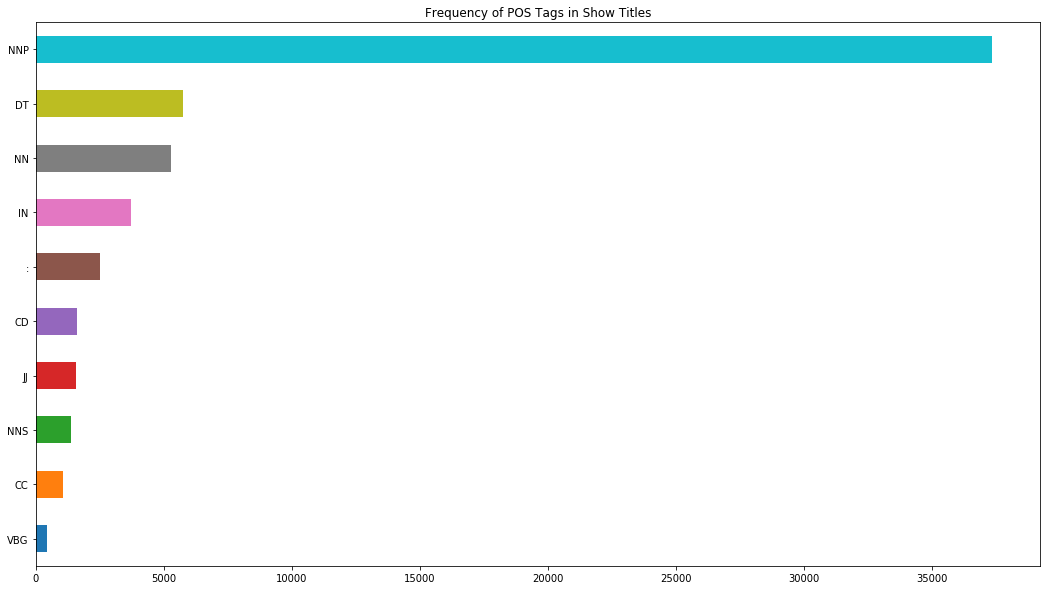

In [56]:

# Function to create tags

def count_tags(title_with_tags):
    tag_count = {}
    for word, tag in title_with_tags:
        if tag in tag_count:
            tag_count[tag] += 1
        else:
            tag_count[tag] = 1
    return(tag_count)


# Mapping the counts with the tags
tagged_titles_df['tag_counts'] = tagged_titles_df['nominee'].map(count_tags)


# Tagset containing all the possible tags
tag_set = list(set([tag for tags in tagged_titles_df['tag_counts'] for tag in tags]))

# Creating tag column frequency for each tags
for tag in tag_set:
    tagged_titles_df[tag] = tagged_titles_df['tag_counts'].map(lambda x: x.get(tag, 0))


# Subsetting the dataframe to contain only the tagset columns    
top_pos=tagged_titles_df[tag_set]

# Sorting and storing the top 10 frequent tags
top_pos=top_pos.sum().sort_values().tail(10)
    
    
# Plotting the barplot of the tag frequency   
title = 'Frequency of POS Tags in Show Titles'    
top_pos.plot(kind='barh', figsize=(18,10), title=title)


plt.show()

# POS that nominates! 

Let's find out having which verb gives you the best chance of being nominated?

## Instructions

- A vocabulary dictionary has been created for you called `'vocab'`

- Create a dataframe from `'vocab'` using `"pd.DataFrame.from_dict()"` method and store it in a variable called `'vocab_df'`. Add `'orient=Index'` as parameter to the above method to make the POS tags as the columns. 

- Fill all the `na` values in `'vocab_df'` with `0`

- Create a subset dataframe called `'top_verb_nominee'` which stores the rows containing top 10 values for the tag `'VBG'`

- Plot the barplot of `'top_verb_nominee'` to see the top 10 verbs in emmy nominated shows/series

- Create a subset dataframe called `'top_noun_nominee'` which stores the rows containing top 10 values for the tag `'NN'`

- Plot the barplot of `'top_noun_nominee'` to see the top 10 nouns in emmy nominated shows/series

## Hints

You can create `top_verb_nominee` by writing code similar to:
```python
top_verb_nominee=vocab_df['VBG'].sort_values().tail(10)
```

Similarly for `'top_noun_nominee'`


## Test cases

#top_verb_nominee
Variable declaration 
len(top_verb_nominee) and top_verb_nominee['Living']==18

#top_noun_nominee
Variable declaration
len(top_noun_nominee) and top_noun_nominee['Man']==70

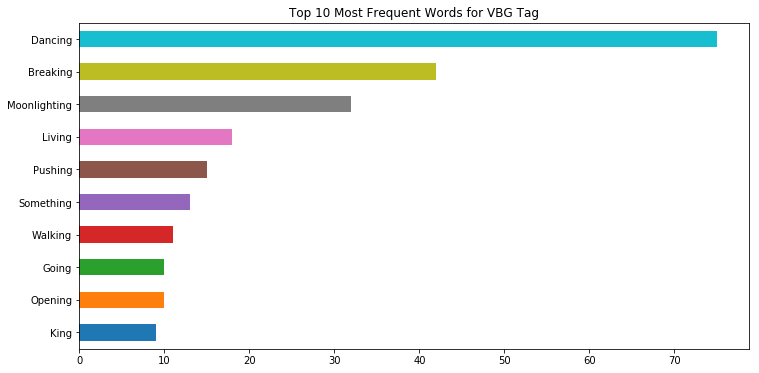

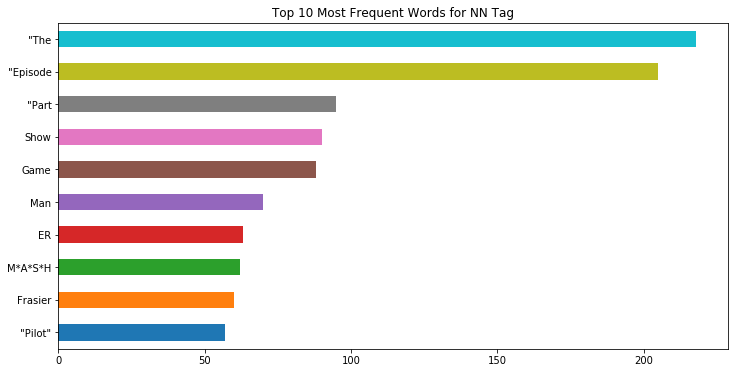

In [64]:
# Function to create vocabulary of the tags
def vocab_creator(tagged_titles):
    vocab = {}

    for row in tagged_titles['nominee']:
        for word, tag in row:
            if word in vocab:
                if tag in vocab[word]:
                    vocab[word][tag] += 1
                else:
                    vocab[word][tag] = 1
            else:
                vocab[word] = {tag: 1}
            
    return vocab    
            
# Creating vocab of our tagged titles dataframe
vocab= vocab_creator(tagged_titles_df)

# Creating dataframe from vocab dictionary
vocab_df = pd.DataFrame.from_dict(vocab,orient='index')

# Fill the nan values of dataframe
vocab_df.fillna(value=0, inplace=True)

# Saving the top 10 most frequent VBG taggged words
size = 10
tag = 'VBG' 
top_verb_nominee=vocab_df[tag].sort_values().tail(size)

# Plotting the top 10 most frequent VBG taggged words 
title = 'Top {} Most Frequent Words for {} Tag'.format(size, tag)
top_verb_nominee.plot(kind='barh', figsize=(12,6), title=title)
plt.show()

# Saving the top 10 most frequent NN taggged words
size = 10
tag = 'NN' 
top_noun_nominee=vocab_df[tag].sort_values().tail(size)

# Plotting the top 10 most frequent NN taggged words 
title = 'Top {} Most Frequent Words for {} Tag'.format(size, tag)
top_noun_nominee.plot(kind='barh', figsize=(12,6), title=title)
plt.show()

# Funny Winners

In this task we will try to deduct having what proper nouns lead to a higher chance of comedy shows/series winning

- Subset the dataframe `'df'` to contain only those shows that have won and shows that are nominated in a category having `'Comedy'` in it. Save the subsetted dataframe in `'new_df'`

- Split the names of the column `nominee` of `'new_df'`, map them with `"pos_tag()"` method of nltk library and store the final result in `'tagged_titles_winner'`

- Print `'tagged_titles_winner'` to see POS tagged show/series

- Create a dataframe called `'tagged_titles_winner_df'`  from `'tagged_titles_winner'` using `"pd.DataFrame()"`

- A vocabulary dictionary has been created for you called `'vocab'`

- Create a dataframe from `'vocab'` using `"pd.DataFrame.from_dict()"` method and store it in a variable called `'vocab_df'`. Add `'orient=Index'` as parameter to the above method to make the POS tags as the columns. 

- Fill all the `na` values in `'vocab_df'` with `0`

- Create a subset dataframe called `'top_proper_noun_nominee'` which stores the rows containing top 5 values for the tag `'NNP'`

- Plot the barplot of `'top_verb_nominee'` to see the top 5 proper nouns in emmy winning shows/series

## Hints

You can create `'new_df'` by writing code similar to:

```python
new_df=df[(df['winner']==1) & (df['category'].str.contains('Comedy'))]
```

## Test cases

#new_df
Variable declaration
np.all((new_df['winner']==1) & (new_df['category'].str.contains('Comedy')))


#top_proper_noun_nominee
Variable declaration
len(top_proper_noun_nominee) and top_proper_noun_nominee['Modern']==16

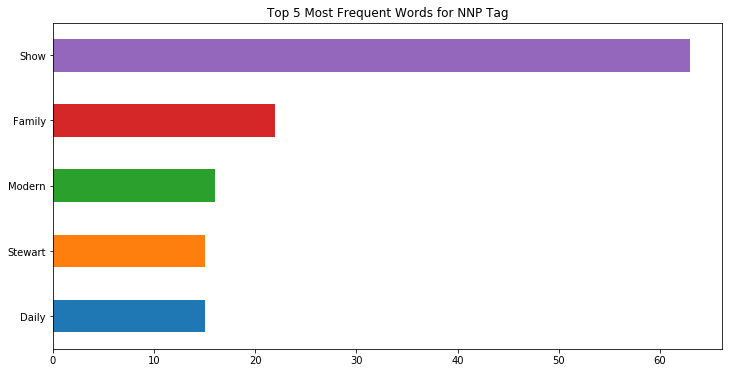

In [75]:
# Subsetting comedy winners
new_df=df[(df['winner']==1) & (df['category'].str.contains('Comedy'))]

# Mapping the position tags of the winners
tagged_titles_winner = new_df['nominee'].str.split().map(pos_tag)

# Creating a dataframe
tagged_titles_winner_df=pd.DataFrame(tagged_titles_winner)

# Creating a vocabulary of the tags
vocab= vocab_creator(tagged_titles_winner_df)

# Creating a dataframe from the dictionary
vocab_df = pd.DataFrame.from_dict(vocab,orient='index')

# Filling the nan values in the dataframe
vocab_df.fillna(value=0, inplace=True)

# Saving the top 5 most frequent NNP taggged words
size = 5
tag = 'NNP' 
top_proper_noun_nominee=vocab_df[tag].sort_values().tail(size)


# Plotting the top 5 most frequent NNP taggged words
title = 'Top {} Most Frequent Words for {} Tag'.format(size, tag)
top_proper_noun_nominee.plot(kind='barh', figsize=(12,6), title=title)
plt.show()


# END OF TASK ---------------------------------------------------

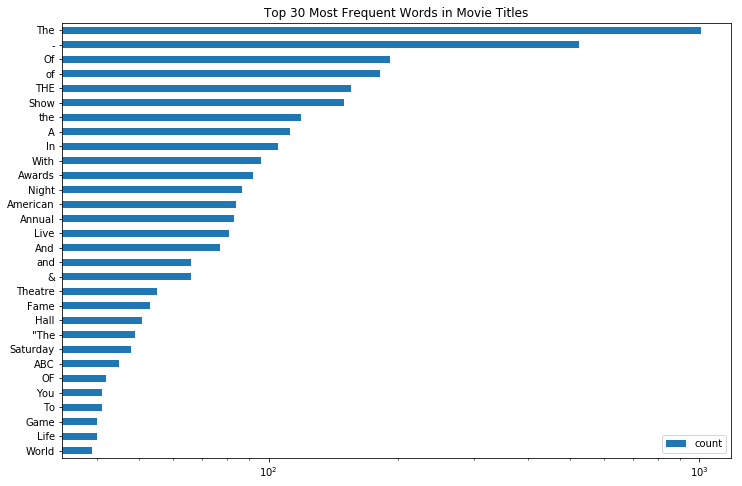

In [26]:
vocab = {}
for row in tagged_titles['nominee']:
    for word, tag in row:
        if word in vocab:
            vocab[word] += 1
             else:
            vocab[word] = 1

vocab_df = pd.DataFrame.from_dict(vocab, orient='index')
vocab_df.columns = ['count']
size = 30
title = 'Top {} Most Frequent Words in Movie Titles'.format(size)
vocab_df.sort_values(by='count').tail(size).plot(kind='barh', logx=True, figsize=(12,8), title=title)

In [27]:
def generate_ngrams(text, n=2):
    words = text.split()
    iterations = len(words) - n + 1
    for i in range(iterations):
       yield words[i:i + n]

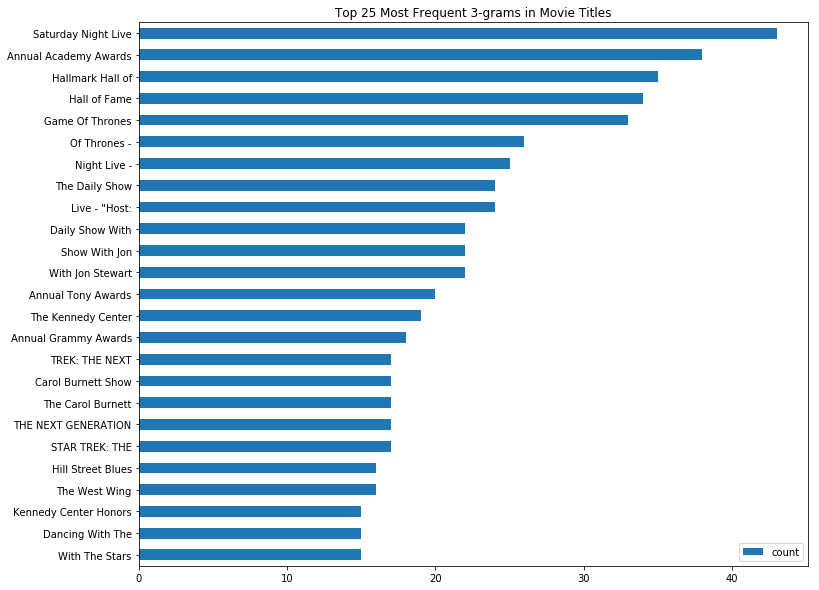

In [28]:
n = 3 # n is the length of the ngram, 2 = bigram, 3 = trigram, etc.
ngrams = {}
for title in new_df['nominee']:
    for ngram in generate_ngrams(title, n):
        ngram = ' '.join(ngram)
        if ngram in ngrams:
            ngrams[ngram] += 1
        else:
            ngrams[ngram] = 1

ngrams_df = pd.DataFrame.from_dict(ngrams, orient='index')
ngrams_df.columns = ['count']
size = 25
title = 'Top {} Most Frequent {}-grams in Movie Titles'.format(size, n)
ngrams_df.sort_values(by='count').tail(size).plot(kind='barh', logx=False, figsize=(12,10), title=title)

In [1]:
import nltk
# nltk.download('conll2000')
from nltk.corpus import conll2000

print (nltk.corpus.conll2000.chunked_sents('train.txt')[99])  # Print the 100th sentence from the training set

print (nltk.corpus.conll2000.chunked_sents('train.txt', chunk_types=('NP', 'VP'))[99]) # Only read the NP and VP chunks

(S
  (PP Over/IN)
  (NP a/DT cup/NN)
  (PP of/IN)
  (NP coffee/NN)
  ,/,
  (NP Mr./NNP Stone/NNP)
  (VP told/VBD)
  (NP his/PRP$ story/NN)
  ./.)
(S
  Over/IN
  (NP a/DT cup/NN)
  of/IN
  (NP coffee/NN)
  ,/,
  (NP Mr./NNP Stone/NNP)
  (VP told/VBD)
  (NP his/PRP$ story/NN)
  ./.)


In [2]:
import pandas as pd
import numpy as np
# df=pd.read_csv('movie_metadata.csv')
df=pd.read_csv('emmy_series.csv')




(19239, 5)


In [9]:
new_df=(df[~df['category'].str.contains("Actor") & ~df['category'].str.contains("Actress")])



In [23]:
new_df.dropna(subset=['nominee'],axis=0,inplace=True)


C:\ProgramData\Miniconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [38]:
new_df.to_csv("emmy_nominees.csv",index=False)